# Great Learning Project - Supervised Learning

## 1. Univariate Analysis

#### A.Import and Read ‘Telecom Churn Data.csv’.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('../../data/Telecom+Churn+Data+SingTel+(2).csv')

In [3]:
df.head(4)

,State,Account Length,Area Code,Phone Number,International Plan,Voice mail Plan,Num of Voice mail Messages,Total Day Minutes,Total Day Calls,Total day Charge,...,Total Eve Calls,Total Eve Charge,Total Night Minutes,Total Night Calls,Total Night Charge,Total International Minutes,Total Intl Calls,Total Intl Charge,Number Customer Service calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.


####  B.Check the target variable. State whether the data is imbalance or balance.

<AxesSubplot:>

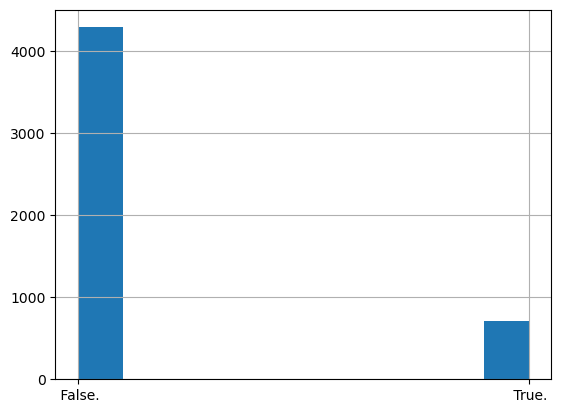

In [4]:
df['Churn'].hist()

In [5]:
df['Churn'].value_counts()

 False.    4293
 True.      707
Name: Churn, dtype: int64

Imbalanced Dataset.More observation for "False".
There are 2 unique values
False.-> 4293
True. -> 707

#### C. Check the distribution of Total international Calls and share insights for the same

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   State                           5000 non-null   object 
 1   Account Length                  5000 non-null   int64  
 2   Area Code                       5000 non-null   int64  
 3   Phone Number                    5000 non-null   object 
 4   International Plan              5000 non-null   object 
 5   Voice mail Plan                 5000 non-null   object 
 6   Num of Voice mail Messages      5000 non-null   int64  
 7   Total Day Minutes               5000 non-null   float64
 8   Total Day Calls                 5000 non-null   int64  
 9   Total day Charge                5000 non-null   float64
 10  Total Eve Minutes               5000 non-null   float64
 11  Total Eve Calls                 5000 non-null   int64  
 12  Total Eve Charge                50

<AxesSubplot:>

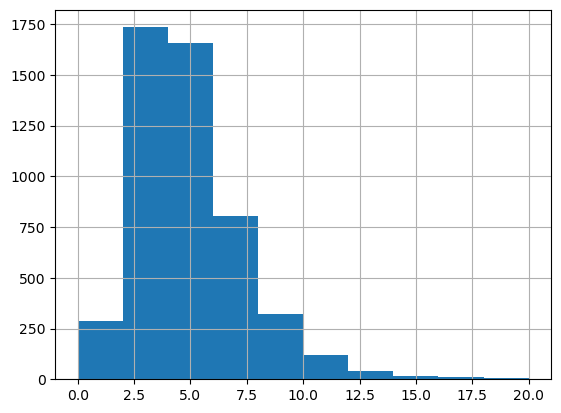

In [7]:
df['Total Intl  Calls'].hist(bins=10)

In [8]:
print('Skewness : {} '.format(df['Total Intl  Calls'].skew()))
print('Kurtosis : {} '.format(df['Total Intl  Calls'].kurtosis()))


Skewness : 1.360692479402265 
Kurtosis : 3.2681836469480894 


Customers with international call counts between 2 and 4 and 4 to 6 seem to be more numerous. As
a result, the distribution is not symmetrical, there is skewness in the range of 2 to 6, and I can
notice increased Kurtosis.
Skewness : 1.361
Kurtosis : 3.268

## 2. Bivariate Analysis

#### A. Study the relationship between International Plan Vs Churn & Churn vs Number of Customer Calls using Bivariate Analysis and state the inference clearly

<b> International Plan Vs Churn </b>

In [9]:
pd.crosstab(df['International Plan'],df['Churn'],margins=True)

Churn,False.,True.,All
International Plan,,,
no,4019,508,4527
yes,274,199,473
All,4293,707,5000


In [10]:
pd.crosstab(df['International Plan'],df['Churn'],margins=True,normalize=True)

Churn,False.,True.,All
International Plan,,,
no,0.8038,0.1016,0.9054
yes,0.0548,0.0398,0.0946
All,0.8586,0.1414,1.0000


There are 473 customers that have chosen the international plan overall, and 199 of them churned
out, representing a 42.07% churn rate and 3.98% of all the customers. There are 4527 customers
overall without an international plan.508 customers have churned out, representing 11.22% churn
rate and 10.16% of all customers.
Therefore, I draw the conclusion that clients who have the International Plan activated are more
likely to leave.

<b> Churn vs Number of Customer Calls </b>

In [11]:
pd.crosstab(df['Churn'],df['Number Customer Service calls '],margins=True)


Number Customer Service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
False.,902,1596,1005,592,141,38,12,6,1,0,4293
True.,121,190,122,73,111,58,22,7,1,2,707
All,1023,1786,1127,665,252,96,34,13,2,2,5000


In [12]:
pd.crosstab(df['Churn'],df['Number Customer Service calls '],margins=True,normalize=True)

Number Customer Service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
False.,0.1804,0.3192,0.2010,0.1184,0.0282,0.0076,0.0024,0.0012,0.0002,0.0000,0.8586
True.,0.0242,0.0380,0.0244,0.0146,0.0222,0.0116,0.0044,0.0014,0.0002,0.0004,0.1414
All,0.2046,0.3572,0.2254,0.1330,0.0504,0.0192,0.0068,0.0026,0.0004,0.0004,1.0000


<AxesSubplot:xlabel='Churn', ylabel='Number Customer Service calls '>

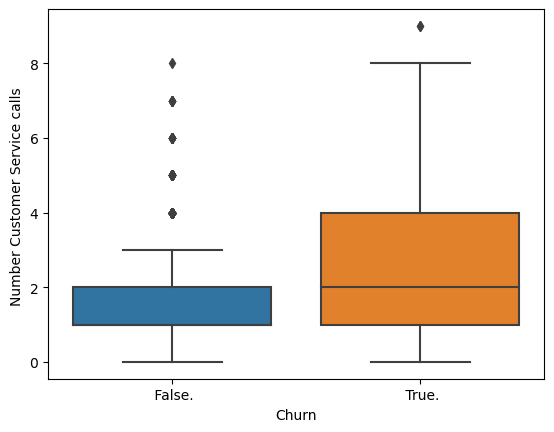

In [13]:
sns.boxplot(x='Churn',y='Number Customer Service calls ',data=df)

In [14]:
df[['Number Customer Service calls ','Churn']].groupby('Churn').describe()

Number Customer Service calls                                      \
                                 count      mean       std  min  25%  50%   
Churn                                                                       
 False.                         4293.0  1.457722  1.164236  0.0  1.0  1.0   
 True.                           707.0  2.254597  1.815956  0.0  1.0  2.0   

                   
         75%  max  
Churn              
 False.  2.0  8.0  
 True.   4.0  9.0

Customers who have been churned out appear to have more service calls than those who have not.
In light of this, it may be said that customers who have made more service calls tend to produce
more. Also I can see some outlier for the churn(False) customers

#### B. Study the relationship between Churn vs Total Day Charge & Churn vs Total Night Charge using boxplot. State the inference Clearly

<b>Churn vs Total Day Charge</b>

<AxesSubplot:xlabel='Churn', ylabel='Total day Charge'>

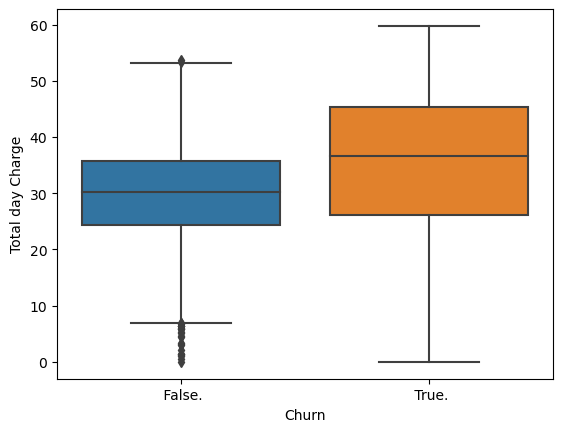

In [15]:
sns.boxplot(x='Churn',y='Total day Charge',data=df)

There churned out customers seems to have more day charge than those who are not churned out.
Min, 25%, Median, 75%, and Max values on the box plot are more likely to be high values.
Few Outliers are seen in Churn=False on lower values but those are all very near to min values so
it may not create any effects.

<b> Churn vs Total Day Charge </b>

<AxesSubplot:xlabel='Churn', ylabel='Total Night Charge'>

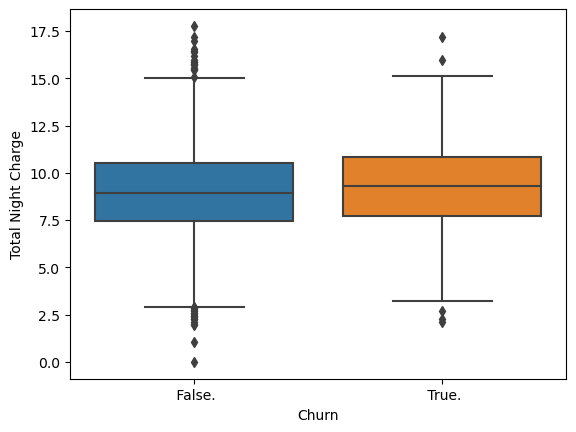

In [16]:
sns.boxplot(x='Churn',y='Total Night Charge',data=df)

For the night charge, there is a slight difference between the two types of customers but otherwise,
the data trend is probably the same.
Outliers are more in Churn=False than Churn=True. (But those are all minimal)

## 3. Model Training

####  For further analysis train a logistic regression model and Naive Bayes model. Evaluate the model using ROC-AUC curve, Accuracy

In [69]:
from sklearn.model_selection import train_test_split

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import numpy as np

In [196]:
def plot_auc_curve(fpr,tpr,score, alg):
    plt.plot(fpr,tpr,color='orange',label='ROC={}'.format(score))
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(alg+" ROC Curve")
    plt.legend()
    plt.show()
    

##### Encdoing

In [171]:
X=df.drop(columns=['Phone Number','Churn'])
y=pd.DataFrame({'Churn':df['Churn']})

In [172]:
encoded_df = pd.get_dummies(X, columns = ['State', 'International Plan','Voice mail Plan'],drop_first=True)


In [173]:
encoded_df.head(1)

,Account Length,Area Code,Num of Voice mail Messages,Total Day Minutes,Total Day Calls,Total day Charge,Total Eve Minutes,Total Eve Calls,Total Eve Charge,Total Night Minutes,...,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,International Plan_ yes,Voice mail Plan_ yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,0,0,0,0,0,0,0,0,0,1


##### Scaling

In [174]:
def scaling_dataset(encoded_dataset):
    scalar = StandardScaler()
    scaled_df=scalar.fit_transform(encoded_dataset)
    return pd.DataFrame(scaled_df,columns=encoded_df.columns)

In [175]:
X_train, X_test, y_train, y_test = train_test_split(encoded_df, y, test_size=0.20, random_state=11,stratify=y)


In [176]:
# Scaling should done after the train-test split to avoid the data leakage
X_train=scaling_dataset(X_train)
X_test=scaling_dataset(X_test)

##### Logistic Regression 

In [177]:
lr = LogisticRegression(n_jobs=4)

In [178]:
lr.fit(X_train,y_train)

/home/daniel/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(n_jobs=4)

In [179]:
prediton=lr.predict(X_test)

In [180]:
print(confusion_matrix(y_test,prediton))
print(classification_report(y_test,prediton))

[[833  26]
 [111  30]]
              precision    recall  f1-score   support

      False.       0.88      0.97      0.92       859
       True.       0.54      0.21      0.30       141

    accuracy                           0.86      1000
   macro avg       0.71      0.59      0.61      1000
weighted avg       0.83      0.86      0.84      1000



In [183]:
y_test_prob=pd.DataFrame({'Churn':np.where(y_test['Churn']==' False.',0,1)})

In [184]:
y_test_prob['Churn'].value_counts()

0    859
1    141
Name: Churn, dtype: int64

In [185]:

lr_predict_proba=lr.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test_prob,lr_predict_proba)
lr_auc_score=roc_auc_score(y_test_prob,lr_predict_proba)
print('Linear Regression AUC Score : {}',format(lr_auc_score))

Linear Regression AUC Score : {} 0.8161890372278504


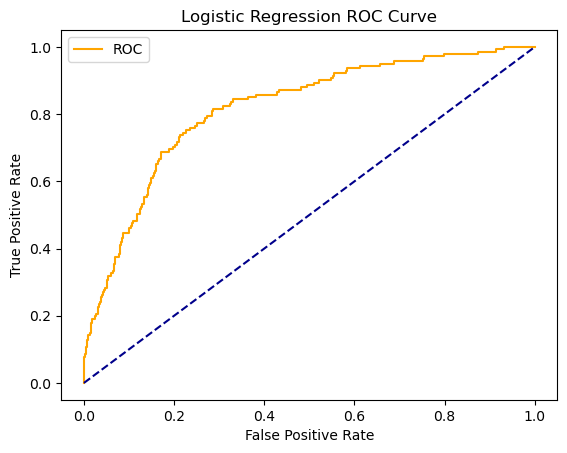

In [186]:
plot_auc_curve(fpr,tpr,'Logistic Regression')

In [187]:
##### Naive Bayes

In [188]:
nb = BernoulliNB()

In [189]:
nb.fit(X_train,y_train.to_numpy().ravel())

BernoulliNB()

In [190]:
nb_prediton=nb.predict(X_test)

In [191]:
print(confusion_matrix(y_test,nb_prediton))
print(classification_report(y_test,nb_prediton))

[[844  15]
 [119  22]]
              precision    recall  f1-score   support

      False.       0.88      0.98      0.93       859
       True.       0.59      0.16      0.25       141

    accuracy                           0.87      1000
   macro avg       0.74      0.57      0.59      1000
weighted avg       0.84      0.87      0.83      1000



##### ROC Curve and AUC Score

In [193]:
nb_predict_proba=nb.predict_proba(X_test)[:,1]
fpr,tpr,_=roc_curve(y_test_prob,nb_predict_proba)
nb_auc_score=roc_auc_score(y_test_prob,nb_predict_proba)
print('Linear Regression AUC Score : {}',format(nb_auc_score))

Linear Regression AUC Score : {} 0.7449945920953772


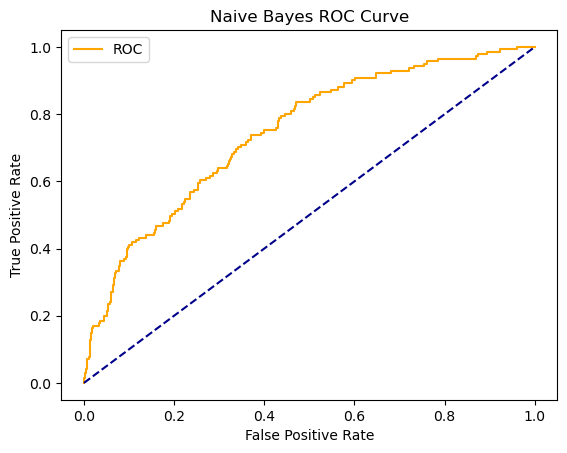

In [194]:
plot_auc_curve(fpr,tpr,'Naive Bayes')